In [13]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [14]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') #covgdep = Allowing for coverage dependance to be considered in the fit
fit.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 47.3 ms, sys: 13.4 ms, total: 60.7 ms
Wall time: 58.3 ms


<IPython.core.display.Javascript object>


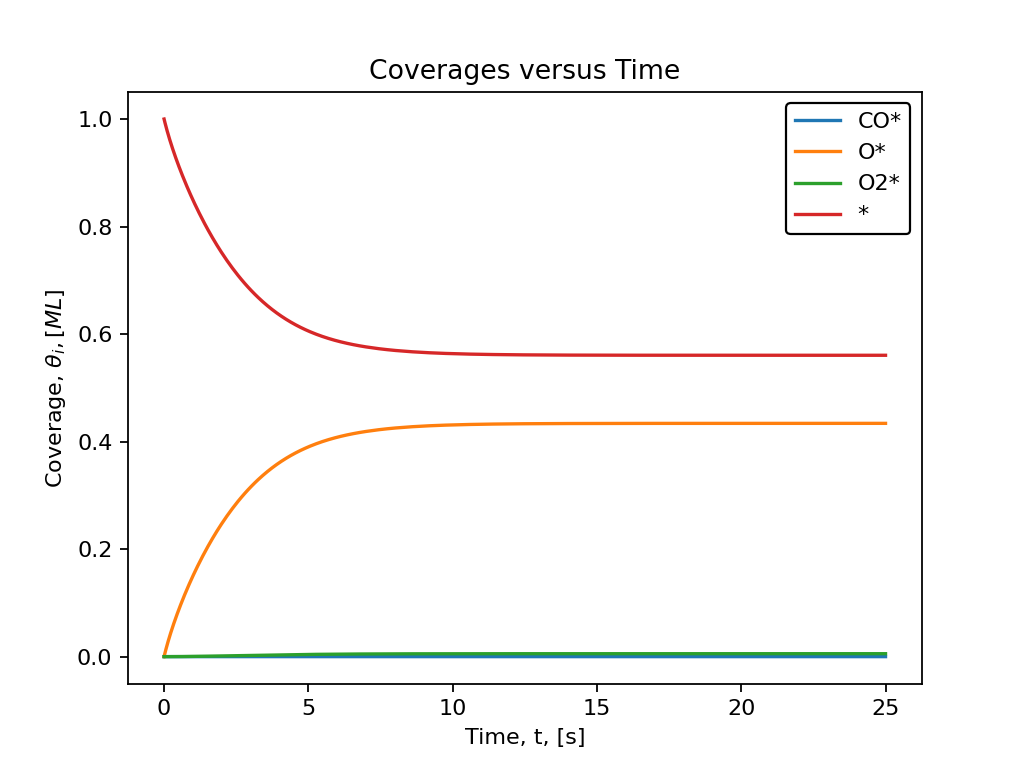

In [15]:
kfit1 = np.array([7.24446662e+06, 1.48359014e+04, 9.21074095e+06, 6.35719296e+00,
 1.26711213e+06, 2.06799121e+04, 2.25184309e+05, 4.08984436e+06])
fit.MKM.k = kfit1
sola1,solta1= fit.MKM.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

In [16]:
fit.MKM.k

array([7.24446662e+06, 1.48359014e+04, 9.21074095e+06, 6.35719296e+00,
       1.26711213e+06, 2.06799121e+04, 2.25184309e+05, 4.08984436e+06])

In [17]:
a = fit.MKM.get_SS_rates_production()[:len(fit.MKM.Pextract())]

In [18]:
print(a)

[-0.03356377 -0.01678209  0.03356377]


In [19]:
actual = np.array([-0.021159,-0.024414,0.028754])

In [20]:
#Calculating %difference
pd = np.empty(len(a))
for i in np.arange(len(a)):
    pd[i] = np.abs((actual[i]-a[i])/(actual[i]))*100

In [21]:
print(pd)

[58.626437   31.26038243 16.72729985]
